In [1]:
import torch
import fastbook

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = r'C:\Users\HP OMEN\Downloads\Compressed\kambing'

In [4]:
fns = get_image_files(path)
fns

(#708) [Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/1.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/10.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/10_jpg.rf.03beb85536bc1f6d57b14869dab5b5af.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/10_jpg.rf.51797951b76af41b85a5fca748fb09ba.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/10_jpg.rf.5a5e4a6205a6392cb8f5decb8129dd48.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/11.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/11_jpg.rf.149a1c6a53c0be6d603039f82c81757f.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/11_jpg.rf.5866febdc6b7aafa04e1d25903363f18.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/11_jpg.rf.8fc3153b3edd7f6d4c8fb02c15a6bebb.jpg'),Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Bengal Goat/12.jpg')...]

In [5]:
failed = verify_images(fns)
failed

(#1) [Path('C:/Users/HP OMEN/Downloads/Compressed/kambing/Boer Goat/18.jpg')]

In [6]:
failed.map(Path.unlink);

In [7]:
goat = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [8]:
goat = goat.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = goat.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


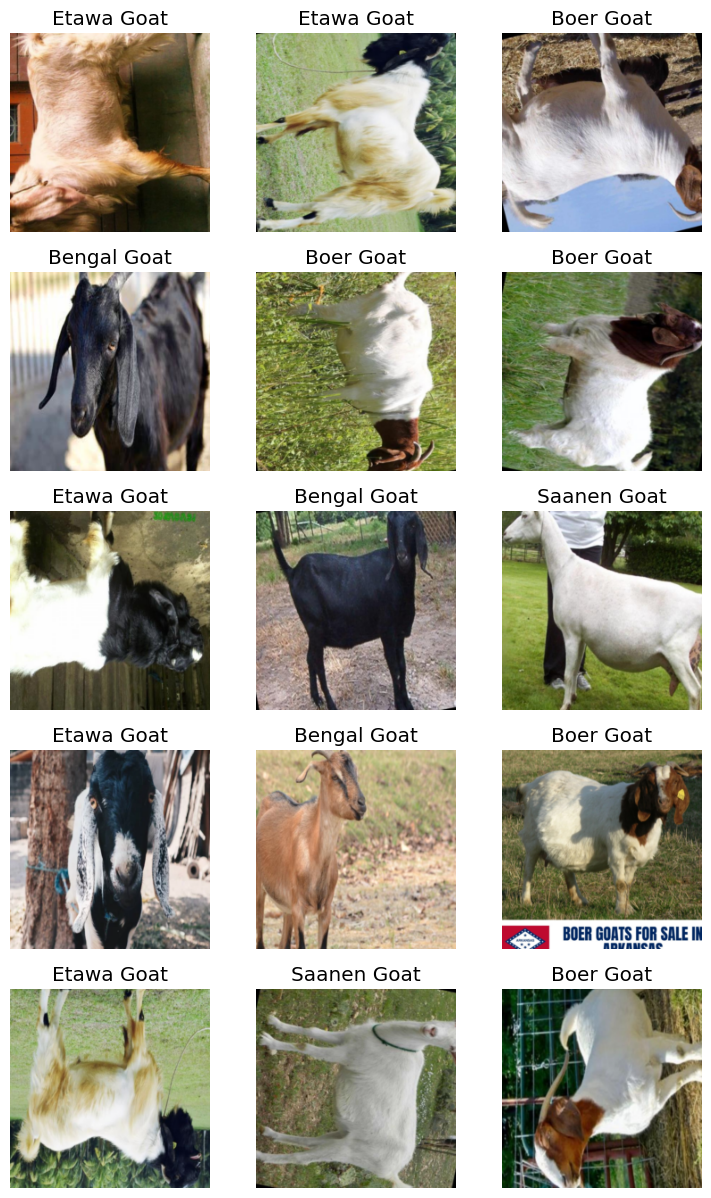

In [9]:
dls.valid.show_batch(max_n=15, nrows=5)

In [10]:
learn = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])

C:\Users\HP OMEN\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\HP OMEN\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
learn.fine_tune(epochs=10)

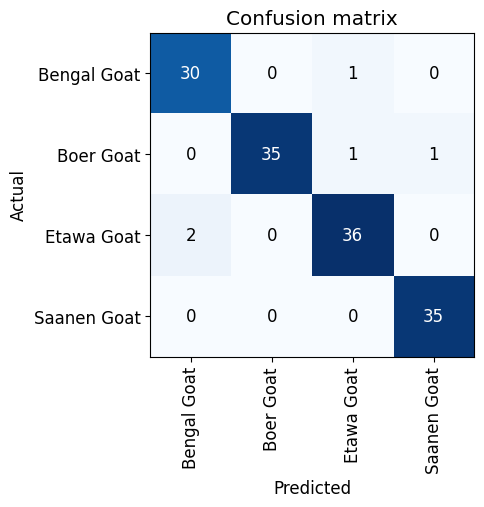

In [12]:
from IPython.core.pylabtools import figsize
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

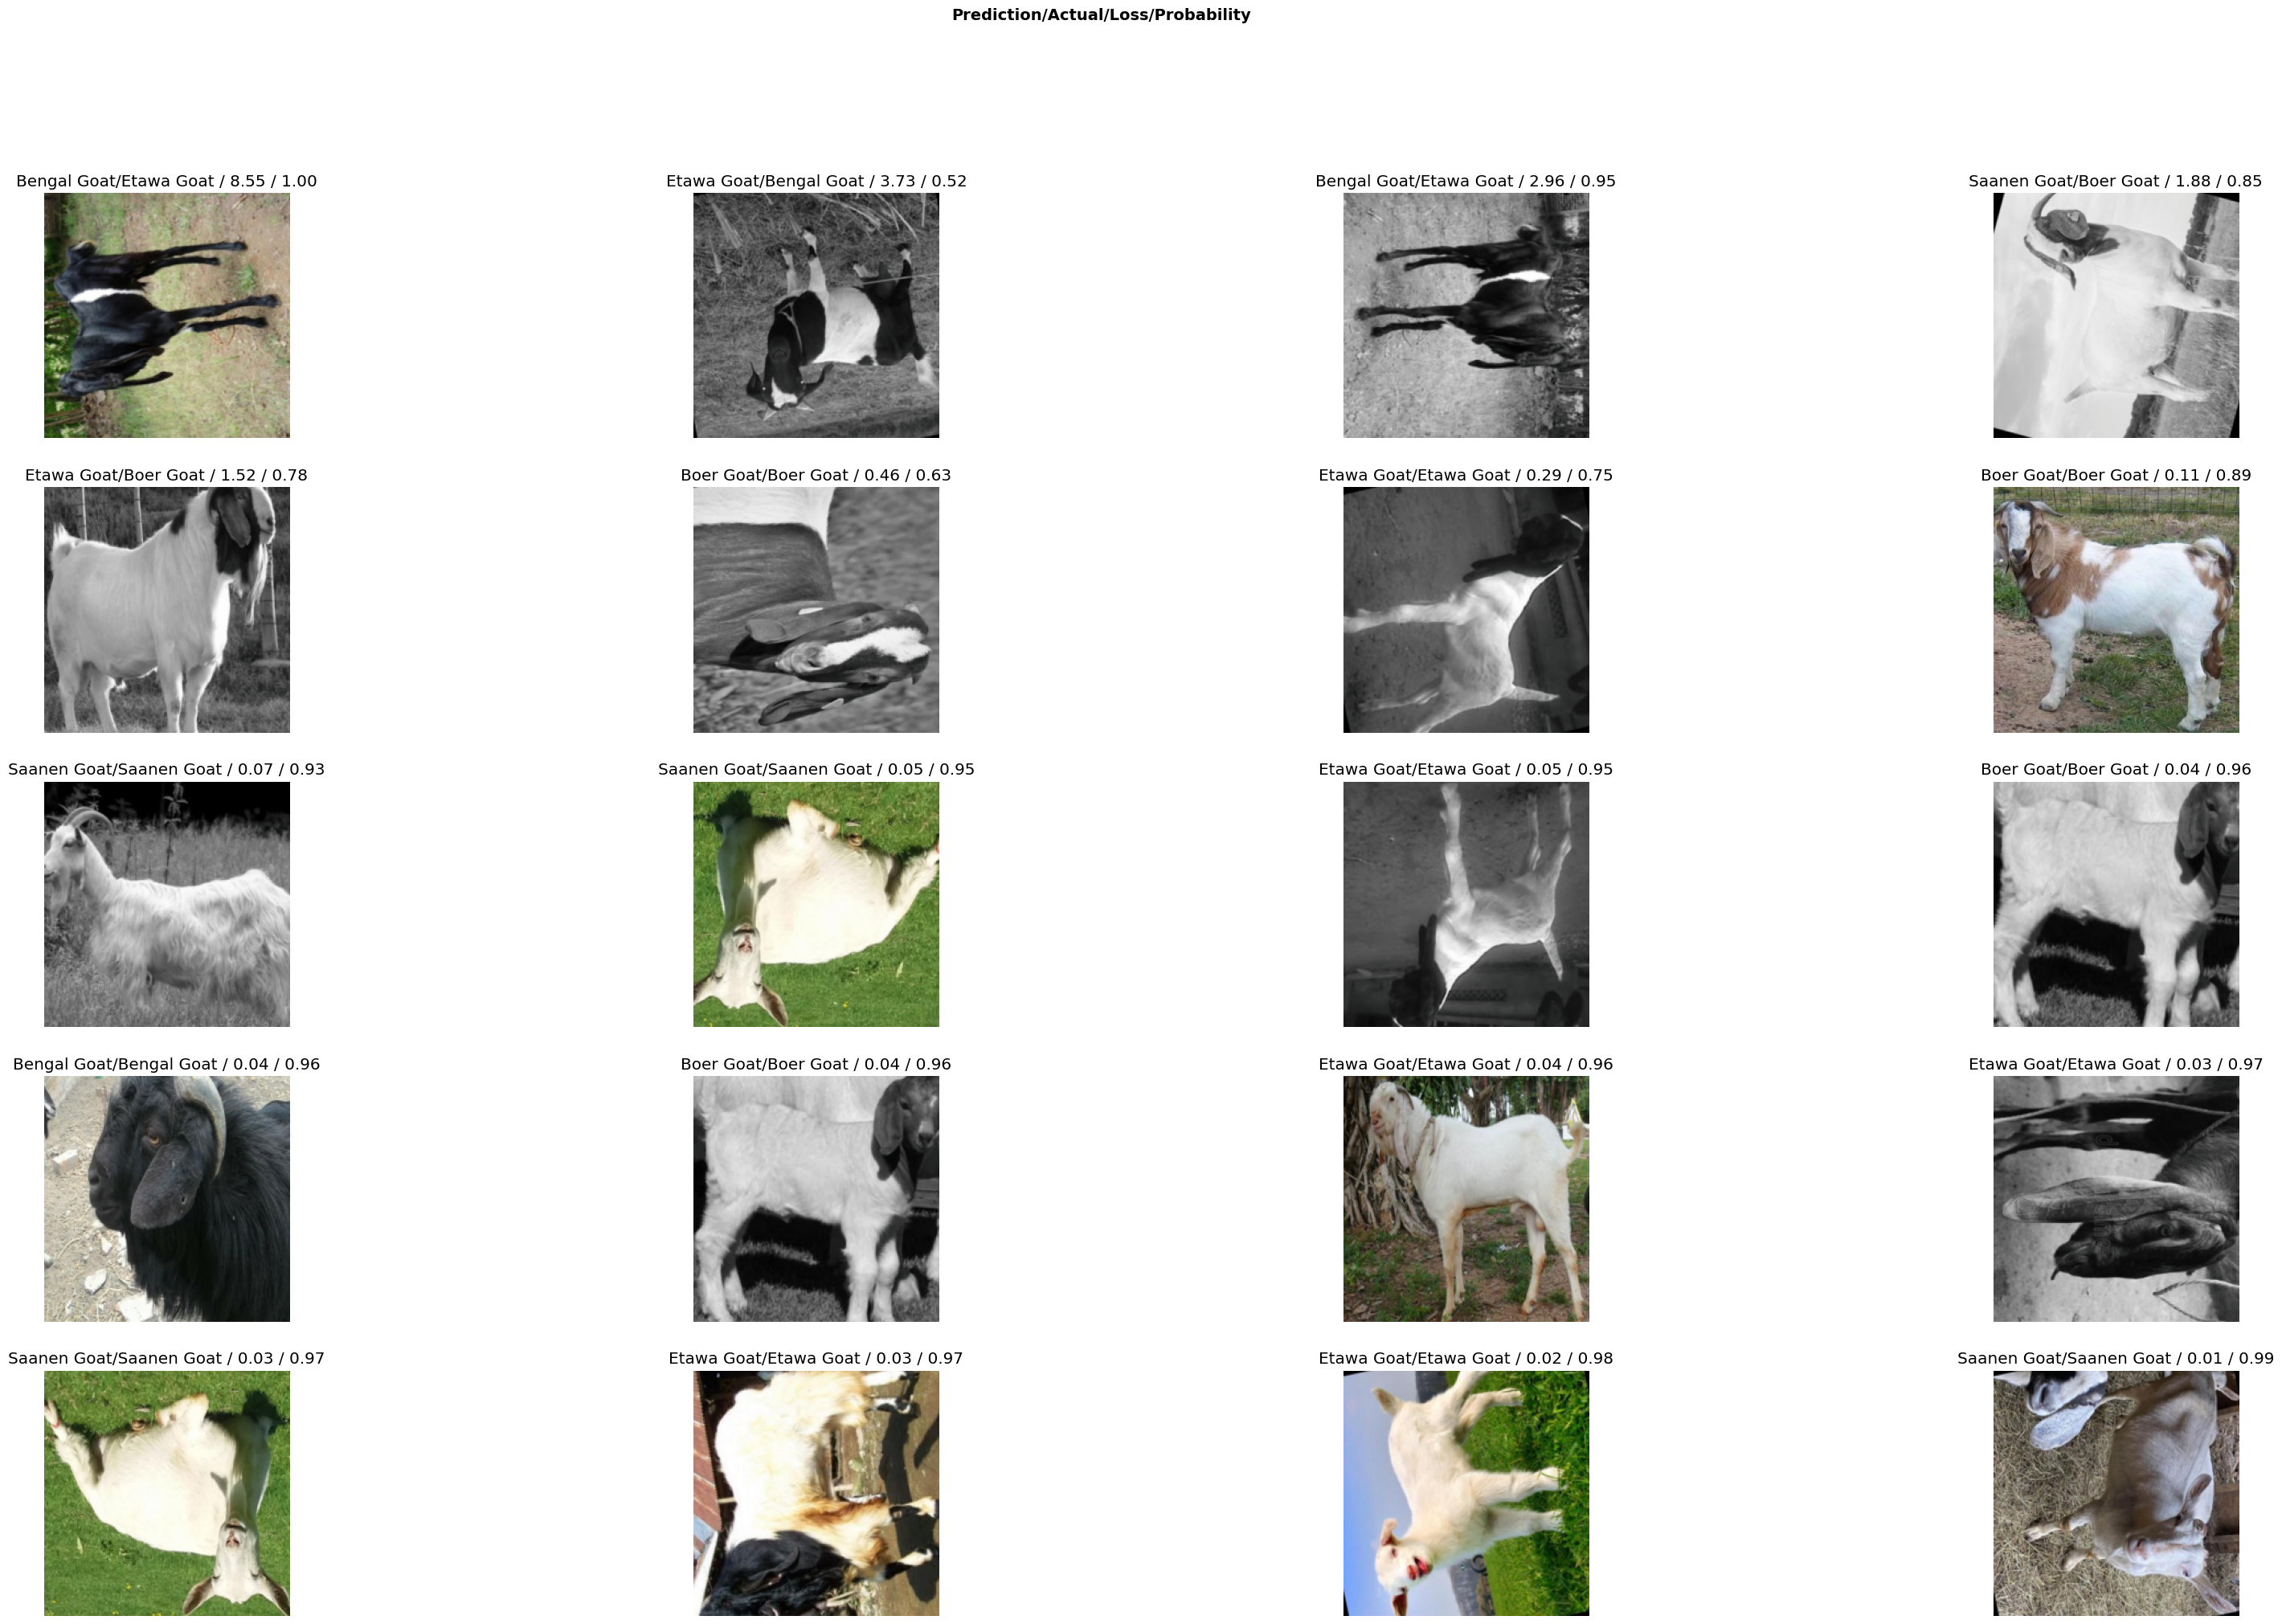

In [13]:
interp.plot_top_losses(20, nrows=5, figsize=(40,23))

In [14]:
learn.export(fname='resnet50.pkl')